In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import re
import numpy as np


import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [5]:
labels = []
images = []
asanas_name = []
images_path = []
images_pixels = []

i=0
dataset_path = "C:\\Users\\grvn1\\Downloads\\yoga"

for directory in os.listdir(dataset_path):
    asanas_name.append(directory)
    for img in os.listdir(os.path.join(dataset_path,directory)):  
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(dataset_path,directory),img)
            images.append(img)
            images_path.append(img_path)
            img_pix = cv2.imread(img_path,1)
            images_pixels.append(cv2.resize(img_pix, (100,100)))
            labels.append(i)
            #print(f"{img} - {img_path}")
        
    i = i+1
print("Total labels: ", len(labels))
print("Total images: ", len(images))
print("Total images path: ", len(images_path))
print("Total asanas: ", len(asanas_name))
print("Total images_pixels: ", len(images_pixels))

Total labels:  5991
Total images:  5991
Total images path:  5991
Total asanas:  107
Total images_pixels:  5991


In [6]:
print(images_path[0:10])
print(images[0:10])

['C:\\Users\\grvn1\\Downloads\\yoga\\adho mukha svanasana\\1. 1.png', 'C:\\Users\\grvn1\\Downloads\\yoga\\adho mukha svanasana\\1. 5-benefits-of-downward-facing-dog-pose.png', 'C:\\Users\\grvn1\\Downloads\\yoga\\adho mukha svanasana\\10. screen-shot-2017-09-15-at-17.00.06-1024x585.png', 'C:\\Users\\grvn1\\Downloads\\yoga\\adho mukha svanasana\\11. yoga_anatomy_using_muscle_awareness_to_lower_your_heels_in_downward_facing_dog_pose.png', 'C:\\Users\\grvn1\\Downloads\\yoga\\adho mukha svanasana\\12. 66a62b8c606fd88e0401b5af0a7cbca7.png', 'C:\\Users\\grvn1\\Downloads\\yoga\\adho mukha svanasana\\12. downward-facing-dog-pose.png', 'C:\\Users\\grvn1\\Downloads\\yoga\\adho mukha svanasana\\13. downward-facing-dog-800x490.png', 'C:\\Users\\grvn1\\Downloads\\yoga\\adho mukha svanasana\\14. downward-dog-pose-as-done-by-a-dog.png', 'C:\\Users\\grvn1\\Downloads\\yoga\\adho mukha svanasana\\14. untitled_design_33.png', 'C:\\Users\\grvn1\\Downloads\\yoga\\adho mukha svanasana\\16. one-leg-downward-f

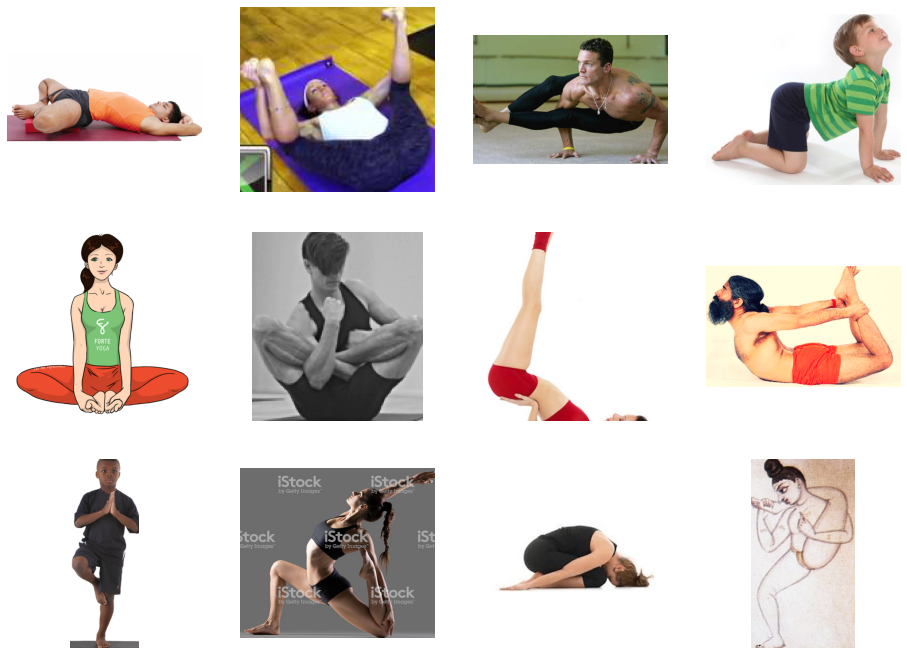

In [7]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

next_pix = images_path.copy()
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):
    
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [8]:
shuf = list(zip(images_pixels,labels))
random.shuffle(shuf)

train_data, labels_data = zip(*shuf)

In [9]:
X_data = np.array(train_data) / 255
Y_data =  to_categorical(labels_data, num_classes = 107)

In [10]:
Y_data[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.], dtype=float32)

In [11]:
print("X data shape: ", X_data.shape)
print("Y data shape: ", Y_data.shape)

X data shape:  (5991, 100, 100, 3)
Y data shape:  (5991, 107)


In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size = 0.4, random_state=101)

print("X train data : ", len(X_train))
print("X label data : ", len(X_val))
print("Y test data : ", len(Y_train))
print("Y label data : ", len(Y_val))

X train data :  3594
X label data :  2397
Y test data :  3594
Y label data :  2397


In [13]:
datagen = ImageDataGenerator(horizontal_flip=False,
                             vertical_flip=False,
                             rotation_range=0,
                             zoom_range=0.2,
                             width_shift_range=0,
                             height_shift_range=0,
                             shear_range=0,
                             fill_mode="nearest")

In [14]:
pretrained_model = tf.keras.applications.DenseNet121(input_shape=(100,100,3),
                                                      include_top=False,
                                                      weights='imagenet',
                                                      pooling='avg')
pretrained_model.trainable = False

29084464/29084464 [==============================] - 7s 0us/step


In [15]:
inputs = pretrained_model.input
drop_layer = tf.keras.layers.Dropout(0.25)(pretrained_model.output)
x_layer = tf.keras.layers.Dense(512, activation='relu')(drop_layer)
x_layer1 = tf.keras.layers.Dense(128, activation='relu')(x_layer)
drop_layer1 = tf.keras.layers.Dropout(0.20)(x_layer1)
outputs = tf.keras.layers.Dense(107, activation='softmax')(drop_layer1)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(datagen.flow(X_train,Y_train,batch_size=32),validation_data=(X_val,Y_val),epochs=50)

Epoch 1/50
113/113 [==============================] - 222s 2s/step - loss: 4.6589 - acc: 0.0289 - val_loss: 4.4574 - val_acc: 0.0446
Epoch 2/50
113/113 [==============================] - 205s 2s/step - loss: 4.2405 - acc: 0.0790 - val_loss: 3.8601 - val_acc: 0.1176
Epoch 3/50
113/113 [==============================] - 201s 2s/step - loss: 3.7262 - acc: 0.1341 - val_loss: 3.2843 - val_acc: 0.2036
Epoch 4/50
113/113 [==============================] - 200s 2s/step - loss: 3.3126 - acc: 0.1878 - val_loss: 2.9400 - val_acc: 0.2411
Epoch 5/50
113/113 [==============================] - 201s 2s/step - loss: 3.0398 - acc: 0.2393 - val_loss: 2.7095 - val_acc: 0.3158
Epoch 6/50
113/113 [==============================] - 203s 2s/step - loss: 2.8576 - acc: 0.2702 - val_loss: 2.6102 - val_acc: 0.3329
Epoch 7/50
113/113 [==============================] - 200s 2s/step - loss: 2.6875 - acc: 0.3005 - val_loss: 2.4602 - val_acc: 0.3584
Epoch 8/50
113/113 [==============================] - 203s 2s/step - 

In [37]:
model.fit(X_train, Y_train)

113/113 [==============================] - 96s 846ms/step - loss: 0.6512 - acc: 0.7871


In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

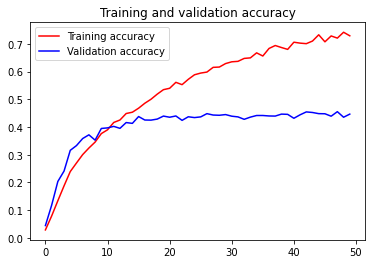

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

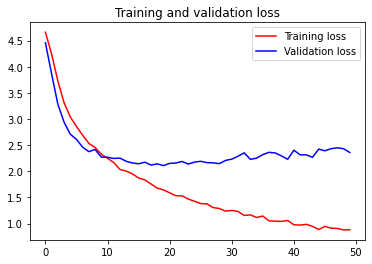

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [21]:
y_pred = model.predict(X_val)
y_pred = tf.argmax(y_pred, axis=1)
print(y_pred)

75/75 [==============================] - 61s 764ms/step
tf.Tensor([99 69  3 ... 48 23 55], shape=(2397,), dtype=int64)


In [22]:
y_test = tf.argmax(Y_val, axis=1)
y_test

<tf.Tensor: shape=(2397,), dtype=int64, numpy=array([99, 45, 99, ...,  8, 21, 52], dtype=int64)>

(1, 100, 100, 3)
1/1 [==============================] - 0s 140ms/step
True prediction


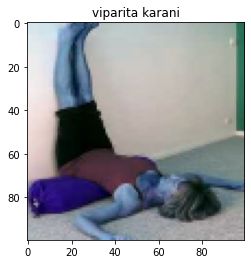

In [27]:
test = X_val[0].reshape(-1,100,100,3)
print(test.shape)
p = model.predict(test)

plt.imshow(X_val[0])
plt.title(asanas_name[np.argmax(p)])
np.argmax(p)
if np.argmax(Y_val[0]) == np.argmax(p):
    print("True prediction")
else:
    print("Wrong prediction")

1/1 [==============================] - 0s 90ms/step


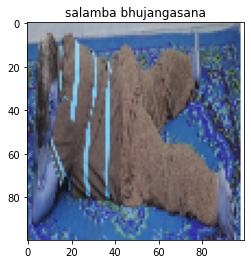

True label: makarasana
1/1 [==============================] - 0s 101ms/step


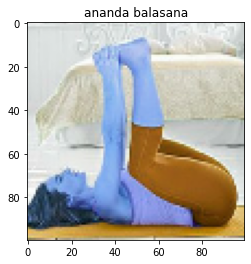

True label: viparita karani
1/1 [==============================] - 0s 87ms/step


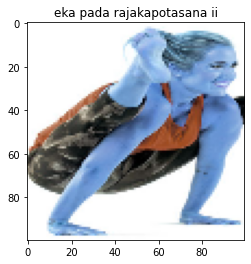

True label: tittibhasana


In [28]:
count = 0
for i in range(10):
    test_image = X_val[i].reshape(-1,100,100,3)
    res = Y_val[i]
    p = model.predict(test_image)
    
    
    if np.argmax(res) != np.argmax(p):
        plt.imshow(X_val[i])
        plt.title(asanas_name[np.argmax(p)])
        plt.show()
        print(f"True label: {asanas_name[np.argmax(res)]}")
        count = count + 1
        if count == 3:
            break